# **Analiza dobitnikov medalj na OI 2024**
Pri vsakem podpoglavju so najprej narejeni izračuni, na koncu pa še povzetek rezultatov.

**Opomba:** Podatke sem pridobila z uradne spletne strani [OI 2024 o dobitnikih medalj](https://olympics.com/en/paris-2024) dne 21. 8. 2024. Verjetnost, da se bodo podatki spremenili je majhna, saj je dogodek končan. V primeru da se uradni rezultati res spremenijo, lahko uporabnik odkomentira spodnji dve vrstici, ter namesto *'url z želenega dne'* doda nov url, ter požene kodo. Opozoriti moram, da bo koda delovala le za pridobitev podatkov s strani za dobitnike medalj z olimpijskih iger in ne poljubne spletne strani s špornimi rezultati.


In [35]:
import pandas as pd
import zajem_podatkov as koda
import matplotlib.pyplot as plt

#željen_url = 'url z želenega dne'
#koda.main(željen_url, medalists_mapa, medalists_filename, csv_filename)

In [36]:
pd.set_option("display.max_rows", 10)
podatki = pd.read_csv("podatki/dobitniki_medalje.csv", index_col="ime")
podatki

,država,spol,disciplina,zlate,srebrne,bronaste,skupaj
ime,,,,,,,
ZHANG Yufei,China,F,Swimming,0,1,5,6
MARCHAND Leon,France,M,Swimming,4,0,1,5
HUSKE Torri,United States,F,Swimming,3,2,0,5
O'CALLAGHAN Mollie,Australia,F,Swimming,3,1,1,5
SMITH Regan,United States,F,Swimming,2,3,0,5
...,...,...,...,...,...,...,...
WOODHEAD Dylan,United States,M,Water Polo,0,0,1,1
ABDULLAEV Gulomjon,Uzbekistan,M,Wrestling,0,0,1,1
TUROBOYEV Muzaffarbek,Uzbekistan,M,Judo,0,0,1,1


## Analiza po spolu

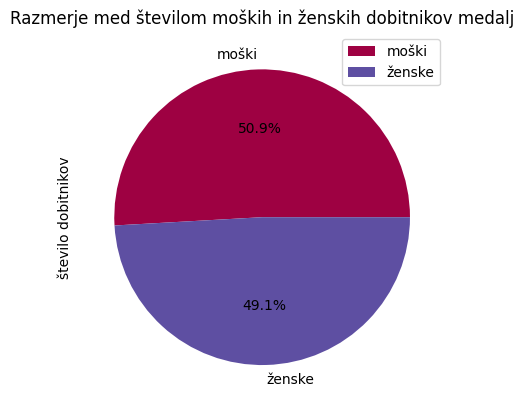

In [165]:
zenske = podatki[podatki['spol'] == 'F']
moski = podatki[podatki['spol'] == 'M']
razmerje = pd.DataFrame({'število dobitnikov': [len(moski), len(zenske)]},
                  index=['moški', 'ženske'])
plot = razmerje.plot.pie(y='število dobitnikov', title='Razmerje med številom moških in ženskih dobitnikov medalj', 
    colormap='Spectral', autopct='%1.1f%%')


Opazimo lahko, da je število ženskih in moških dobitnikov medalj približno enako. Razlika izhaja iz tega, da je 152 disciplin za ženske, 158 disciplin za moške ter 20 mešanih disciplin (vir: [spletna stran OI 2024](https://olympics.com/ioc/news/genderequalolympics-paris-2024-making-history-on-the-field-of-play))


## Najboljši tekmovalci

In [77]:
najboljsi = podatki[podatki['skupaj'] > 1]
len(najboljsi)


194

In [90]:
len(najboljsi)/len(podatki)*100

9.623015873015873

In [78]:
najboljsi.head(10)

,država,spol,disciplina,zlate,srebrne,bronaste,skupaj
ime,,,,,,,
ZHANG Yufei,China,F,Swimming,0,1,5,6
MARCHAND Leon,France,M,Swimming,4,0,1,5
HUSKE Torri,United States,F,Swimming,3,2,0,5
O'CALLAGHAN Mollie,Australia,F,Swimming,3,1,1,5
SMITH Regan,United States,F,Swimming,2,3,0,5
McKEOWN Kaylee,Australia,F,Swimming,2,1,2,5
McINTOSH Summer,Canada,F,Swimming,3,1,0,4
BILES Simone,United States,F,Artistic Gymnastics,3,1,0,4
OKA Shinnosuke,Japan,M,Artistic Gymnastics,3,0,1,4


In [79]:
najboljsi_zlati = podatki[podatki['zlate'] > 1]
len(najboljsi_zlati)


46

In [91]:
len(najboljsi_zlati)/len(podatki)*100

2.2817460317460316

In [80]:
najboljsi_zlati.head(10)

,država,spol,disciplina,zlate,srebrne,bronaste,skupaj
ime,,,,,,,
MARCHAND Leon,France,M,Swimming,4,0,1,5
HUSKE Torri,United States,F,Swimming,3,2,0,5
O'CALLAGHAN Mollie,Australia,F,Swimming,3,1,1,5
SMITH Regan,United States,F,Swimming,2,3,0,5
McKEOWN Kaylee,Australia,F,Swimming,2,1,2,5
McINTOSH Summer,Canada,F,Swimming,3,1,0,4
BILES Simone,United States,F,Artistic Gymnastics,3,1,0,4
OKA Shinnosuke,Japan,M,Artistic Gymnastics,3,0,1,4
TITMUS Ariarne,Australia,F,Swimming,2,2,0,4


In [88]:
najboljsi_z = najboljsi[najboljsi['spol'] == 'F']
najboljsi_m = najboljsi[najboljsi['spol'] == 'M']
najboljsi_zlati_z = najboljsi_zlati[najboljsi_zlati['spol'] == 'F']
najboljsi_zlati_m = najboljsi_zlati[najboljsi_zlati['spol'] == 'M']
len(najboljsi_z), len(najboljsi_m), len(najboljsi_zlati_z), len(najboljsi_zlati_m)


(110, 84, 30, 16)

Dobitnikov več kot ene medalje je 194, kar je 9,6 % vseh tekmovalcev. Dobitnikov več kot ene zlate medalje pa je 46, kar predstavlja 2,3 % vseh tekmovalcel. Opazimo lahko, da je 'najlažje' dobiti veliko medalj pri plavanju, saj so si različne discipline toliko podobne, da lahko tekmovalec tekmuje v večih (razlika na primer le v dolžini). V zadnjem izračunu pa vidimo, da medalje bolje nabirajo ženske, saj je takih, ki imajo več medalj kar 110, moških pa 84. Podobno je tudi pri dobitnikih več zlatih medalj.

## Analiza po državah

**Opomba**: Pri nadaljnjih izračunih ni bilo upoštevano dejstvo, da je pri ekipnih športih bila 'ena medalja' šteta večkrat, natančneje za vsakega tekmovalca v ekipi, kar je vplivalo na podatke, zato niso popolnoma zanesljivi. 

In [124]:
po_državah = podatki.groupby('država')
št_dobitnikov_na_državo = po_državah.size().sort_values(ascending=False)
št_dobitnikov_na_državo.head(10)


država
United States    255
France           168
China            131
Great Britain    131
Netherlands      107
Germany          104
Australia         93
Spain             81
Italy             80
Japan             70
dtype: int64

In [130]:
št_medalj_na_državo = po_državah.sum('skupaj').sort_values('skupaj', ascending=False)['skupaj']
št_medalj_na_državo.head(10)

država
United States    318
France           184
China            168
Great Britain    149
Australia        121
Netherlands      115
Germany          111
Italy             87
Spain             83
Japan             82
Name: skupaj, dtype: int64

<Axes: title={'center': 'Število dobljenih medalj na državo'}, xlabel='država'>

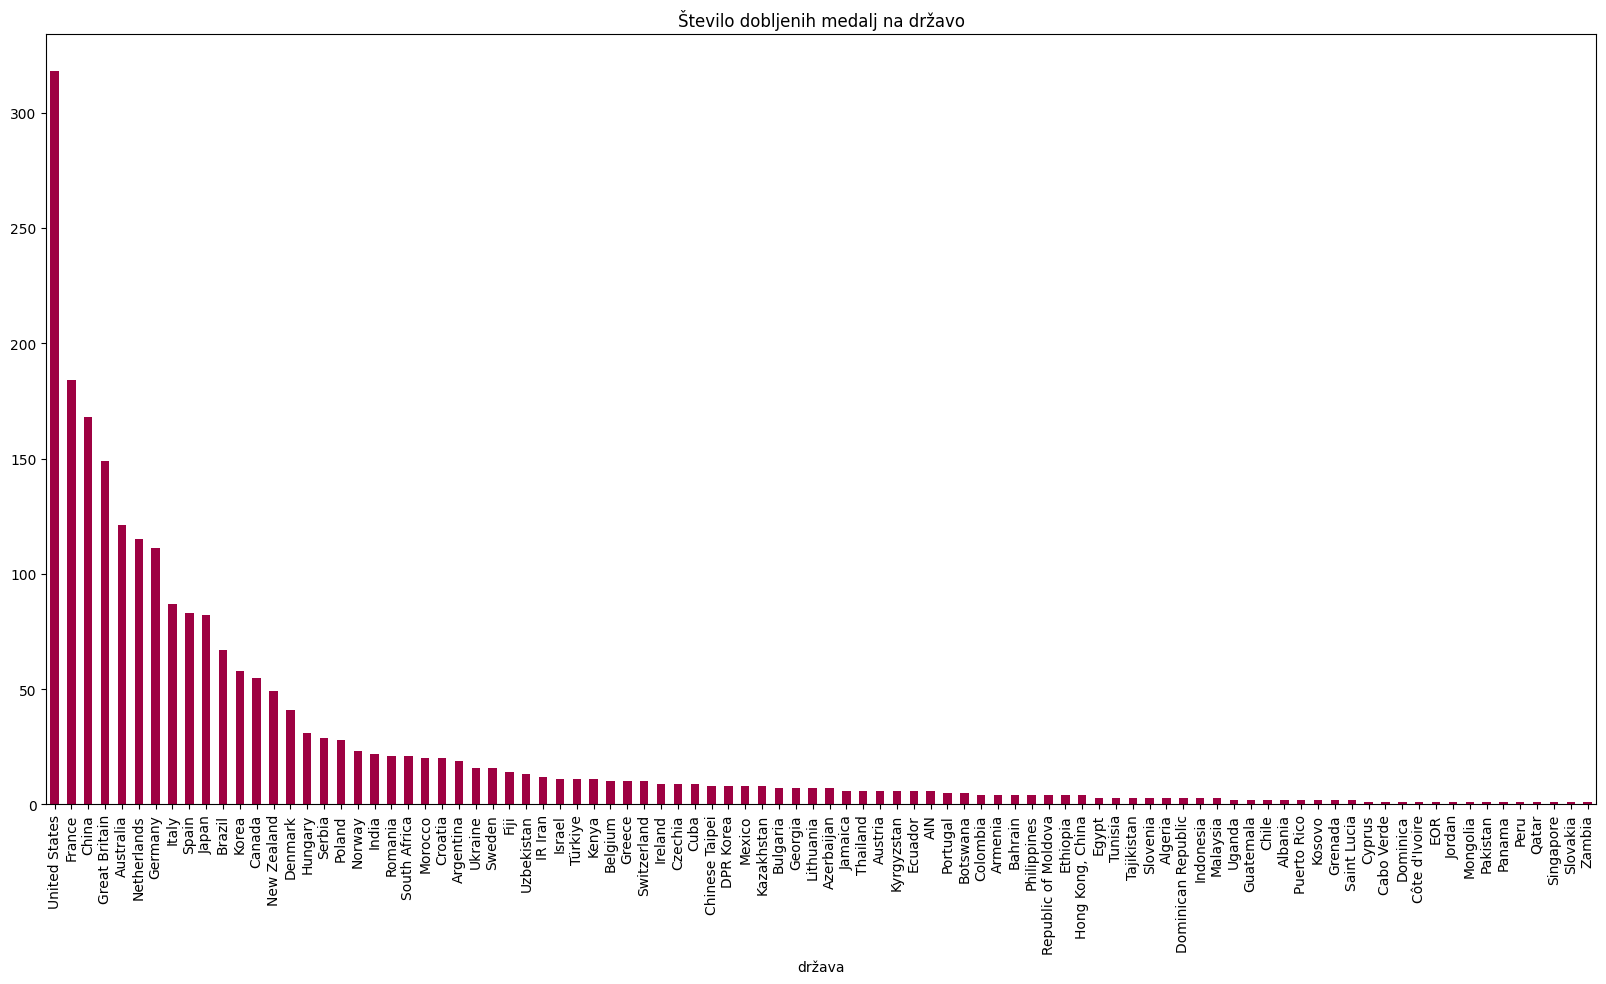

In [166]:
št_medalj_na_državo.plot.bar(y='Število medalj na državo', title='Število dobljenih medalj na državo', 
    colormap='Spectral', figsize=(20,10))

Najuspešnejše države na OI 2024 so bile ZDA, Francija in Kitajska, tako po številu dobitnikov medalj kot po številu dobljenih medalj. Opazimo tudi da so v Avstraliji in Španiji posamezni tekmovalci bili bolj uspešni, saj sta se v tabeli s številom dobljenih medalj uvrstili nekaj mest višje kot v tabeli dobitnikov medalj.

Za naslednji del analize po državah sem s spletne strani [World population review](https://worldpopulationreview.com/countries) prenesla csv datoteko s podatki o številu prebivalcev v posameznih državah.

In [170]:
podatki_preb = pd.read_csv("podatki/countries-table.csv", index_col='država')
št_preb_po_državah = podatki_preb['pop2024']
združeno = pd.merge(št_medalj_na_državo, št_preb_po_državah, on='država').sort_values('pop2024', ascending=False)
združeno

,skupaj,pop2024
država,,
India,22,1450935791
China,168,1419321278
United States,318,345426571
Indonesia,3,283487931
Pakistan,1,251269164
...,...,...
Cyprus,1,1358282
Fiji,14,928784
Saint Lucia,2,179744


<Axes: title={'center': 'Število dobljenih medalj v odvisnosti od števila prebivalcev'}, xlabel='pop2024'>

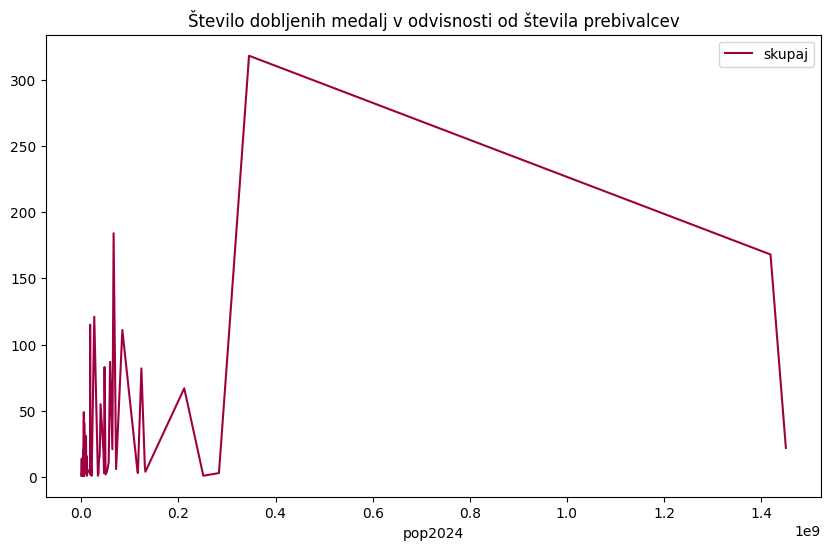

In [171]:
združeno.plot('pop2024', 'skupaj', title='Število dobljenih medalj v odvisnosti od števila prebivalcev', 
    colormap='Spectral', figsize=(10,6))

Direktne povezave med številom prebivalcev in številom dobljenih medalj ni. Seveda je tu treba opozoriti tudi na to, da je pri združevanju podatkov nekaj držav 'izpadlo' zaradi razlik v poimenovanju države oz. olimpijske ekipe te države.


## Slovenci

In [95]:
slovenci = podatki[podatki['država'] == 'Slovenia']
slovenci

,država,spol,disciplina,zlate,srebrne,bronaste,skupaj
ime,,,,,,,
GARNBRET Janja,Slovenia,F,Sport Climbing,1,0,0,1
LESKI Andreja,Slovenia,F,Judo,1,0,0,1
VODISEK Toni,Slovenia,M,Sailing,0,1,0,1


## Plezalci

In [119]:
plezalci = podatki[(podatki['disciplina'] == 'Sport Climbing')]
pd.set_option("display.max_rows", 12)
plezalci.sort_values('spol')

,država,spol,disciplina,zlate,srebrne,bronaste,skupaj
ime,,,,,,,
MIROSLAW Aleksandra,Poland,F,Sport Climbing,1,0,0,1
GARNBRET Janja,Slovenia,F,Sport Climbing,1,0,0,1
DENG Lijuan,China,F,Sport Climbing,0,1,0,1
RABOUTOU Brooke,United States,F,Sport Climbing,0,1,0,1
PILZ Jessica,Austria,F,Sport Climbing,0,0,1,1
KALUCKA Aleksandra,Poland,F,Sport Climbing,0,0,1,1
ROBERTS Toby,Great Britain,M,Sport Climbing,1,0,0,1
LEONARDO Veddriq,Indonesia,M,Sport Climbing,1,0,0,1
WU Peng,China,M,Sport Climbing,0,1,0,1
